In [81]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FixedLocator
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


file_path = r'D:\\Programmers Dev Course_Data Analyst Track\\project2\data\\cleared_dataset_dataco_supplychain.csv'
data = pd.read_csv(file_path)

In [82]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

datetime_val = dt.datetime.strptime('2017-10-02 12:46:00', '%Y-%m-%d %H:%M:%S')

data = data[data["order date (DateOrders)"] <= datetime_val]

In [83]:
Q1 = data['Order Profit Per Order'].quantile(0.25)
Q3 = data['Order Profit Per Order'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = data['Order Profit Per Order'].between(lower_bound, upper_bound, inclusive='both')

data_no_outliers = data[mask]

original_row_count = len(data)
filtered_row_count = len(data_no_outliers)
removed_row_count = original_row_count - filtered_row_count

data = data_no_outliers
print(removed_row_count)

18032


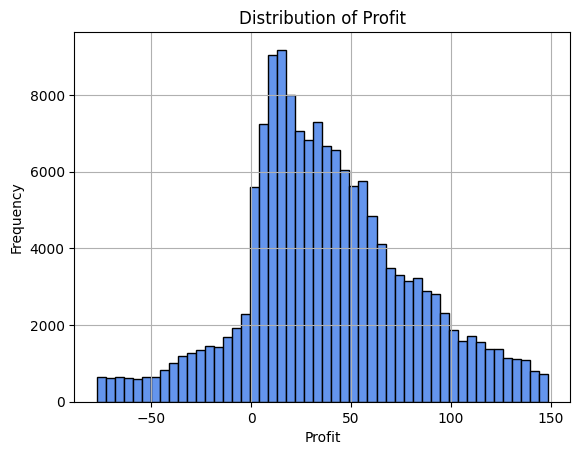

In [84]:
counts, bins, patches = plt.hist(data['Order Profit Per Order'], bins=50, color='#6495ed', edgecolor='black')

plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.grid(True)

plt.show()

In [86]:
pd.set_option('display.max_columns', 100)

pd.set_option('display.max_rows', 200)

In [87]:
data['Order Item Discount Rate'] = data['Order Item Discount Rate'] * 100

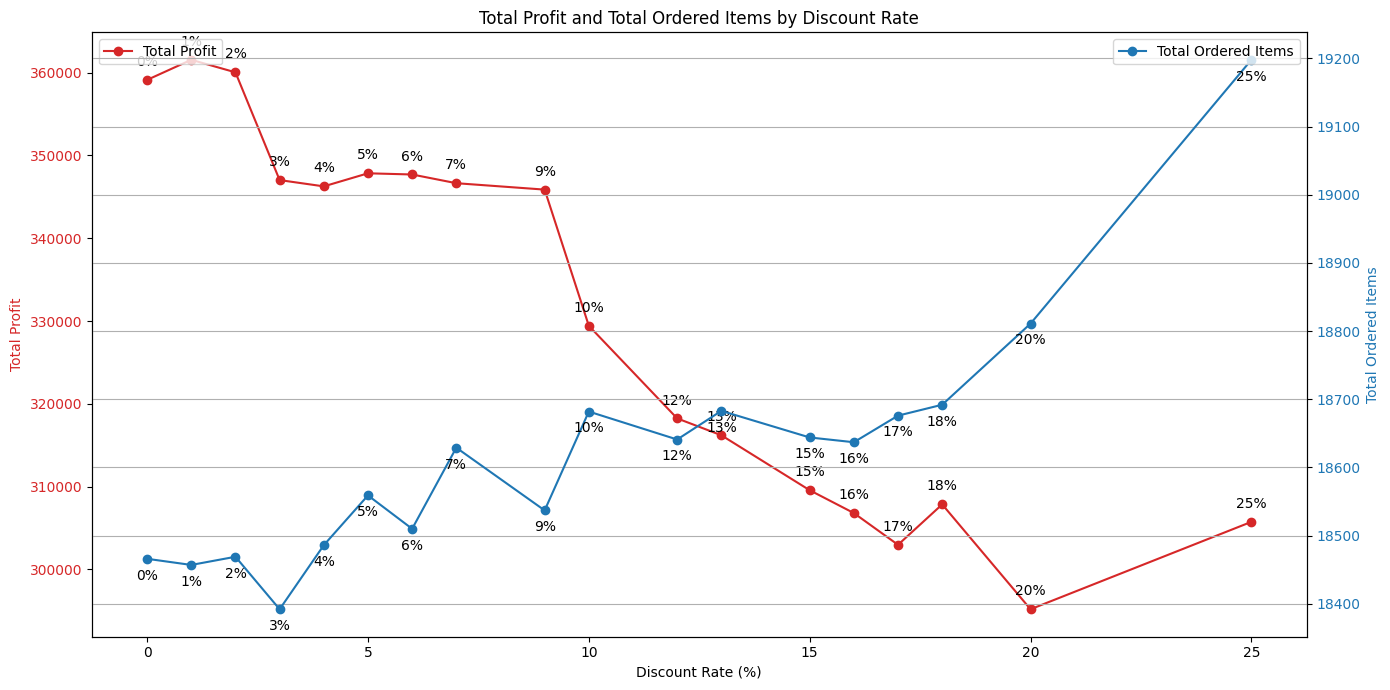

In [157]:
grouped_data = data.groupby('Order Item Discount Rate').agg({
    'Order Profit Per Order': 'sum',
    'Order Item Quantity': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Discount Rate (%)')
ax1.set_ylabel('Total Profit', color=color)
profit_line = ax1.plot(grouped_data['Order Item Discount Rate'], grouped_data['Order Profit Per Order'], color=color, marker='o', linestyle='-', label='Total Profit')
ax1.tick_params(axis='y', labelcolor=color)

for x, y in zip(grouped_data['Order Item Discount Rate'], grouped_data['Order Profit Per Order']):
    ax1.annotate(f"{x:.0f}%", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Ordered Items', color=color)
quantity_line = ax2.plot(grouped_data['Order Item Discount Rate'], grouped_data['Order Item Quantity'], color=color, marker='o', linestyle='-', label='Total Ordered Items')
ax2.tick_params(axis='y', labelcolor=color)

for x, y in zip(grouped_data['Order Item Discount Rate'], grouped_data['Order Item Quantity']):
    ax2.annotate(f"{x:.0f}%", (x, y), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Total Profit and Total Ordered Items by Discount Rate')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)
plt.show()

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\160594698.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_profit = data.groupby(['Category Name', 'Discount Category'])['Order Profit Per Order'].mean().unstack()


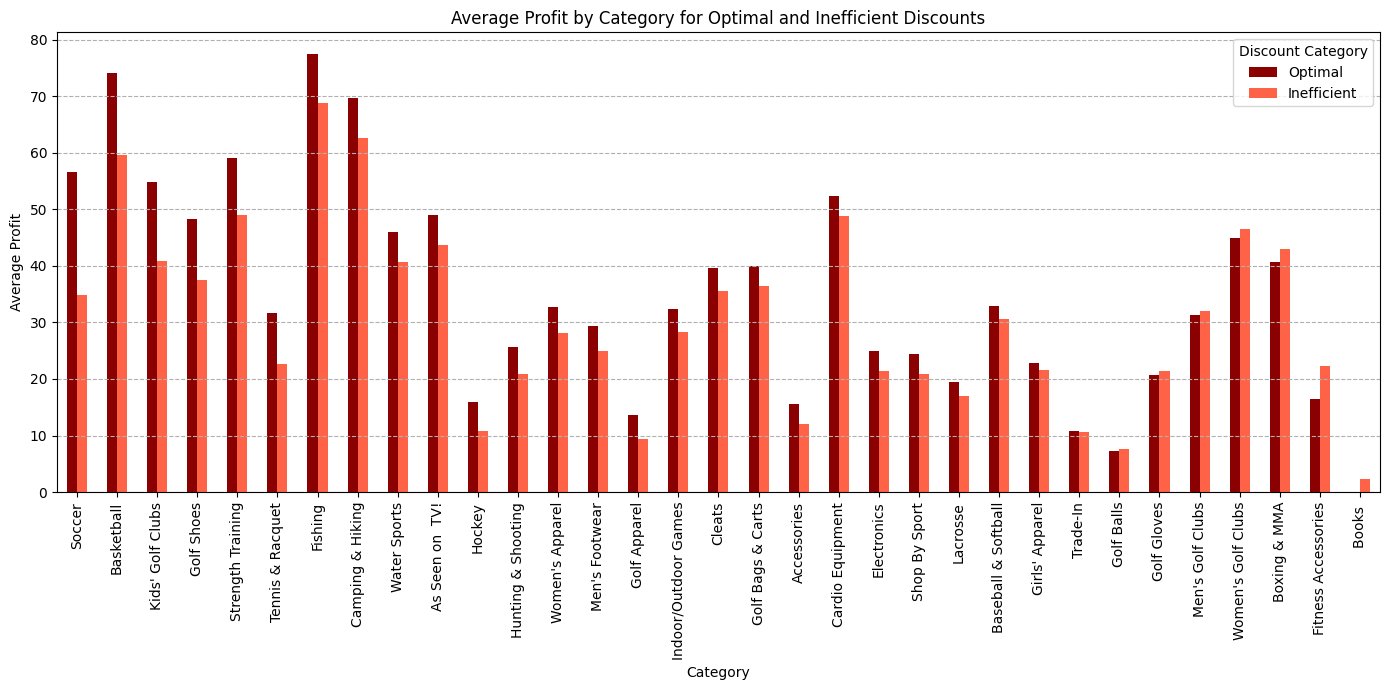

In [159]:
data['Discount Category'] = pd.cut(
    data['Order Item Discount Rate'],
    bins=[0, 4, 10, data['Order Item Discount Rate'].max()],
    right=False,
    labels=['Below Optimal', 'Optimal', 'Inefficient']
)

category_profit = data.groupby(['Category Name', 'Discount Category'])['Order Profit Per Order'].mean().unstack()

category_profit['Gap'] = category_profit['Optimal'] - category_profit['Inefficient']

category_profit_sorted = category_profit.sort_values('Gap', ascending=False)

category_profit_sorted = category_profit_sorted[['Optimal', 'Inefficient']]

colors = ['#8b0000', '#ff6347']
category_profit_sorted.plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Average Profit by Category for Optimal and Inefficient Discounts')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.xticks(rotation=90)
plt.legend(title='Discount Category')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\3302623411.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  market_profit = data.groupby(['Market', 'Discount Category'])['Order Profit Per Order'].mean().unstack()


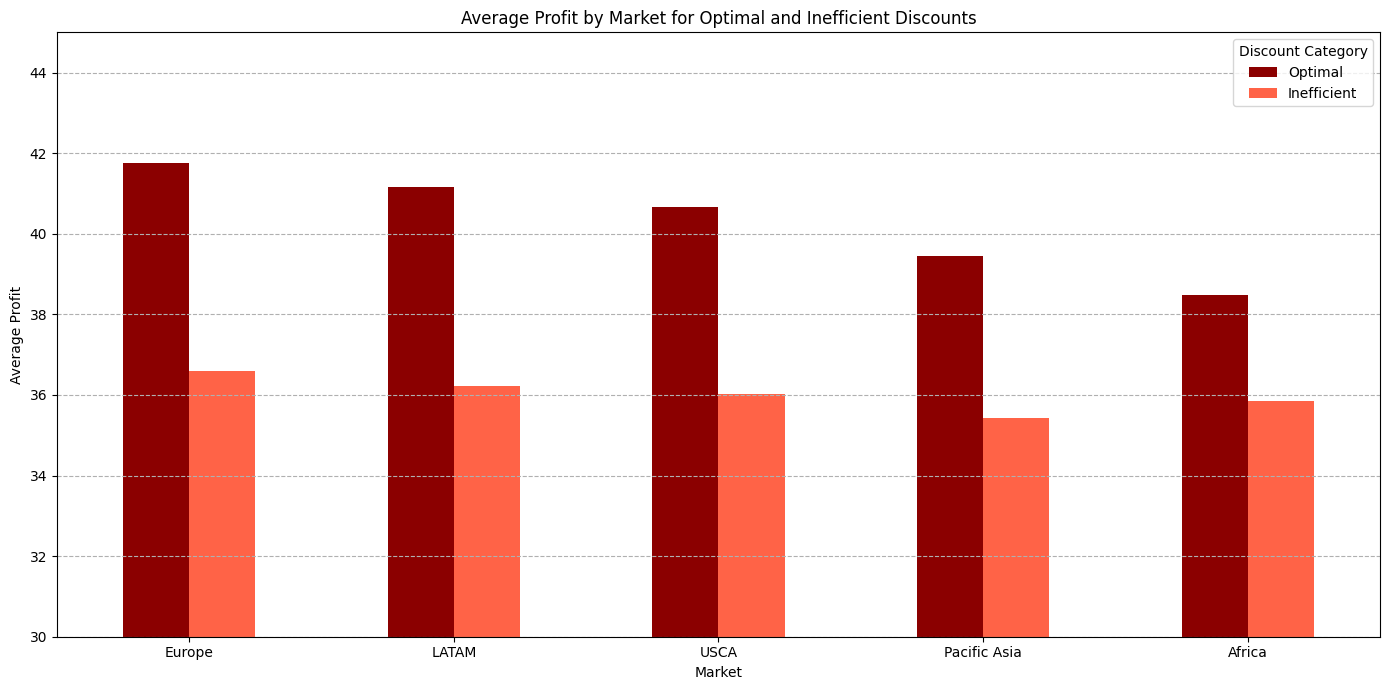

In [168]:
data['Discount Category'] = pd.cut(
    data['Order Item Discount Rate'],
    bins=[0, 4, 10, data['Order Item Discount Rate'].max()],
    right=False,
    labels=['Below Optimal', 'Optimal', 'Inefficient']
)

market_profit = data.groupby(['Market', 'Discount Category'])['Order Profit Per Order'].mean().unstack()

market_profit['Gap'] = market_profit['Optimal'] - market_profit['Inefficient']

market_profit_sorted = market_profit.sort_values('Gap', ascending=False)

market_profit_sorted = market_profit_sorted[['Optimal', 'Inefficient']]

colors = ['#8b0000', '#ff6347']
market_profit_sorted.plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Average Profit by Market for Optimal and Inefficient Discounts')
plt.xlabel('Market')
plt.ylabel('Average Profit')
plt.xticks(rotation=0)
plt.legend(title='Discount Category')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.ylim(30, 45)
plt.show()


C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\1256879437.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped_data['Category Name'], rotation=90, ha='right')


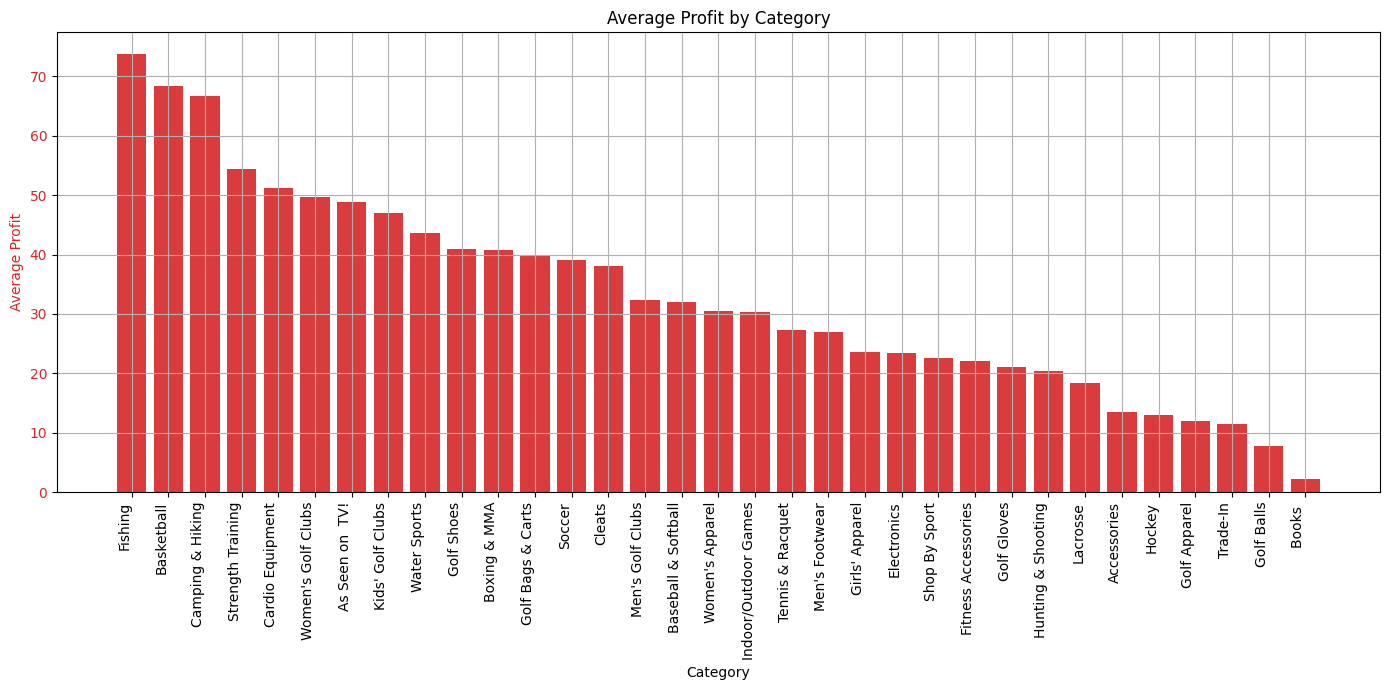

In [162]:
grouped_data = data.groupby('Category Name').agg({
    'Order Profit Per Order': 'mean'
}).reset_index()

grouped_data = grouped_data.sort_values('Order Profit Per Order', ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax.set_xlabel('Category')
ax.set_ylabel('Average Profit', color=color)
ax.bar(grouped_data['Category Name'], grouped_data['Order Profit Per Order'], color=color, alpha=0.9, label='Average Profit')
ax.tick_params(axis='y', labelcolor=color)

ax.set_xticklabels(grouped_data['Category Name'], rotation=90, ha='right')

plt.title('Average Profit by Category')
fig.tight_layout()
plt.grid(True)
plt.show()

In [95]:
data.sort_values(['Customer Id', 'order date (DateOrders)'], inplace=True)

data['Next Customer'] = data['Customer Id'].shift(-1)
data['Is Repurchase'] = data['Customer Id'].eq(data['Next Customer'])

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\709436600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['On Time'] = data_filtered['Days for shipping (real)'] <= data_filtered['Days for shipment (scheduled)']


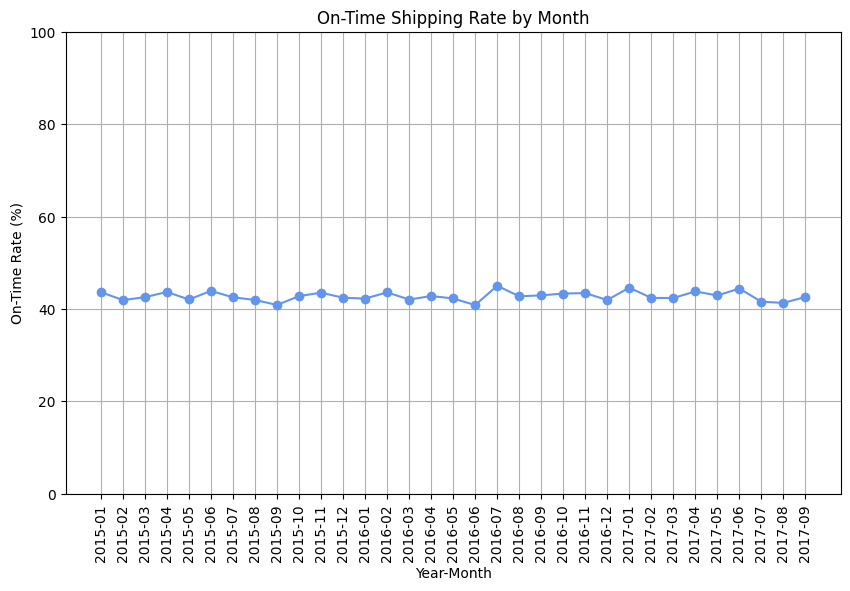

In [96]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

data['YearMonth'] = data['order date (DateOrders)'].dt.to_period('M')

data_filtered = data[data['YearMonth'] != '2017-10']

data_filtered['On Time'] = data_filtered['Days for shipping (real)'] <= data_filtered['Days for shipment (scheduled)']

on_time_rate = data_filtered.groupby('YearMonth').agg(
    On_Time_Shipments=('On Time', 'sum'),
    Total_Orders=('YearMonth', 'size')
).assign(
    On_Time_Rate=lambda x: (x['On_Time_Shipments'] / x['Total_Orders']) * 100
)

on_time_rate.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(on_time_rate['YearMonth'].astype(str), on_time_rate['On_Time_Rate'], marker='o', linestyle='-', color='#6495ed')
plt.title('On-Time Shipping Rate by Month')
plt.xlabel('Year-Month')
plt.ylabel('On-Time Rate (%)')
plt.grid(True)
plt.xticks(rotation=90)

plt.ylim(0, 100)
plt.show()

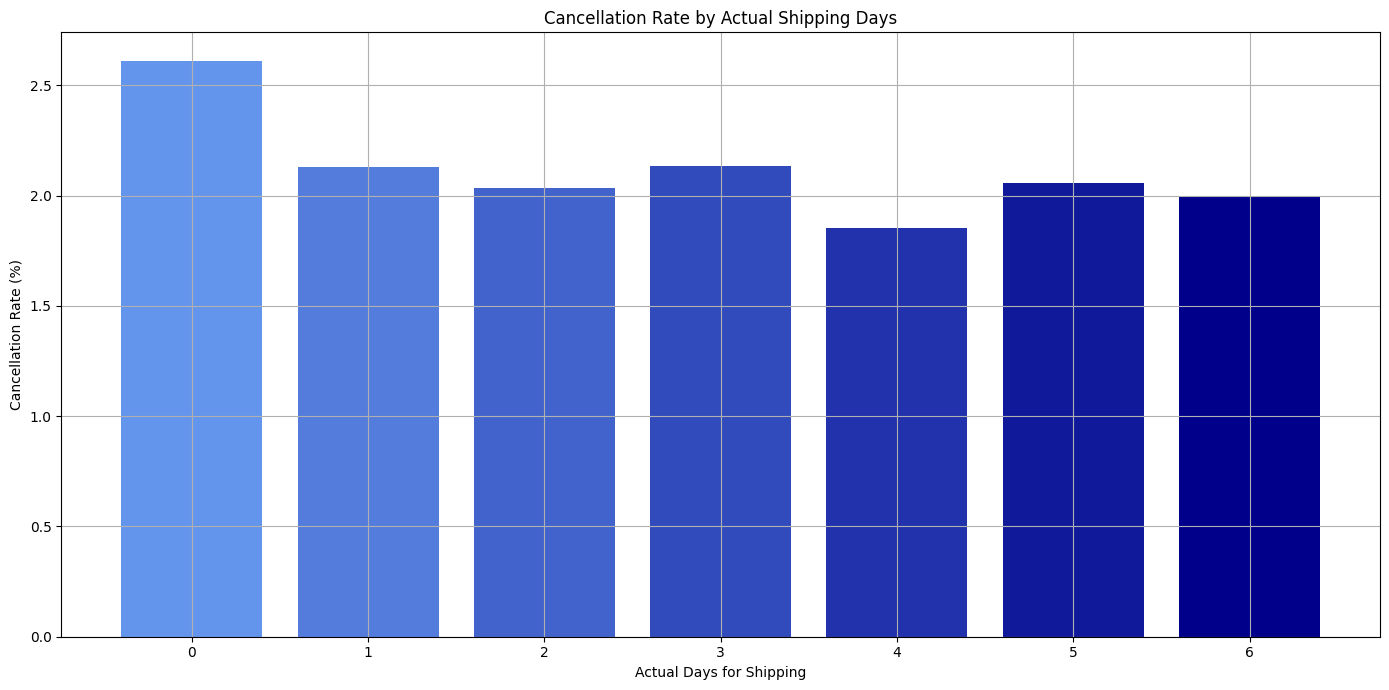

In [97]:
data['Is Canceled'] = (data['Order Status'] == 'CANCELED').astype(int)

grouped_data = data.groupby('Days for shipping (real)').agg({
    'Is Canceled': 'mean'
}).reset_index()


grouped_data['Is Canceled'] *= 100

n_bins = len(grouped_data)
colors = ['#6495ed', '#00008b']
cmap = LinearSegmentedColormap.from_list("grad", colors, N=n_bins)

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(grouped_data['Days for shipping (real)'], grouped_data['Is Canceled'], color=cmap(np.linspace(0, 1, n_bins)))

ax.set_xlabel('Actual Days for Shipping')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_title('Cancellation Rate by Actual Shipping Days')

plt.grid(True)
fig.tight_layout()
plt.show()

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\3158798210.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cancellations = data.groupby('Shipping Timeliness')['Is Canceled'].mean() * 100


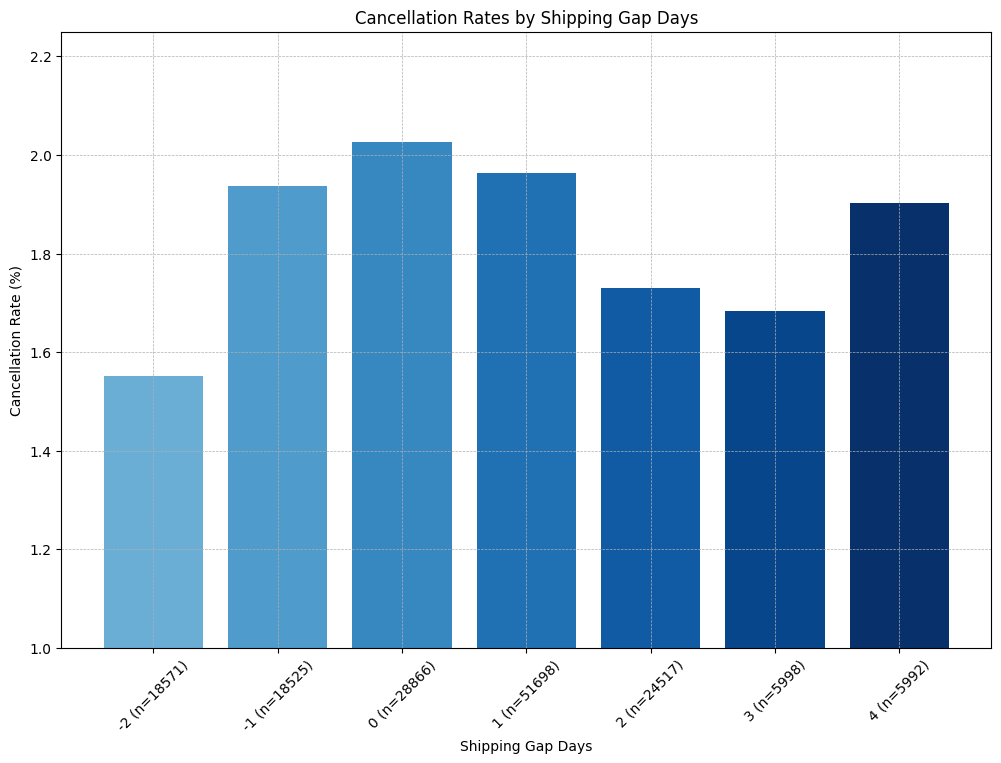

In [98]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

data.sort_values(['Customer Id', 'order date (DateOrders)'], inplace=True)

data['Next Order Status'] = data.groupby('Customer Id')['Order Status'].shift(-1)

data['Is Canceled'] = (data['Next Order Status'] == 'CANCELED').astype(int)

data['Shipping Gap'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

bins = [-float('inf'), -3, -2, -1, 0, 1, 2, 3, 4, float('inf')]
labels = ['< -3', '-2', '-1', '0', '1', '2', '3', '4', '> 4']

data['Shipping Timeliness'] = pd.cut(data['Shipping Gap'], bins=bins, labels=labels)

entry_counts = data['Shipping Timeliness'].value_counts().reindex(labels)

total_cancellations = data.groupby('Shipping Timeliness')['Is Canceled'].mean() * 100

specific_labels = ['-2', '-1', '0', '1', '2', '3', '4']
specific_data = total_cancellations.reindex(specific_labels)
specific_entries = entry_counts.reindex(specific_labels)

colors = plt.cm.Blues(np.linspace(0.5, 1, len(specific_labels)))

custom_labels = [f"{label} (n={specific_entries.get(label, 0)})" for label in specific_labels]

plt.figure(figsize=(12, 8))
bars = plt.bar(custom_labels, specific_data.values, color=colors)
plt.title('Cancellation Rates by Shipping Gap Days')
plt.xlabel('Shipping Gap Days')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.ylim(1.0, 2.25)

plt.show()

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\763002709.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rates = data.groupby('Shipping Timeliness')['Is Canceled'].mean() * 100


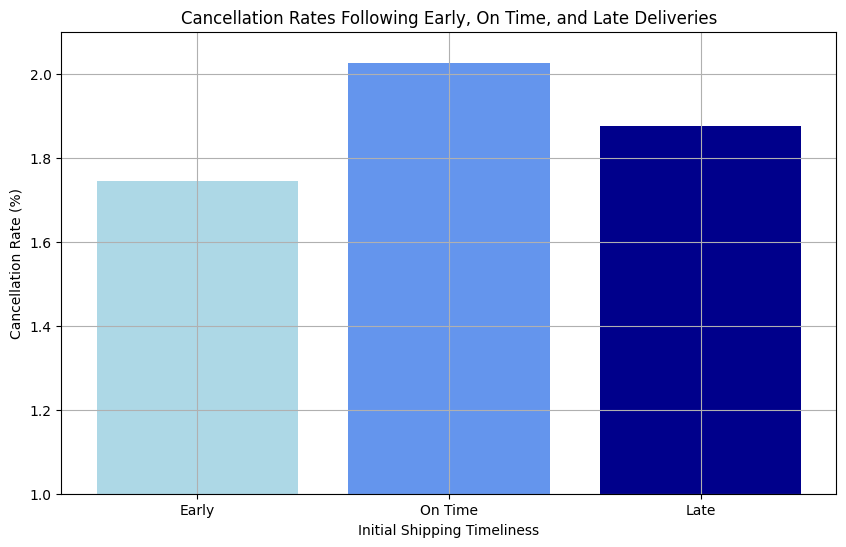

In [164]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

data['Shipping Gap'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

bins = [-float('inf'), -1, 0, float('inf')]
labels = ['Early', 'On Time', 'Late']
data['Shipping Timeliness'] = pd.cut(data['Shipping Gap'], bins=bins, labels=labels)

data.sort_values(['Customer Id', 'order date (DateOrders)'], inplace=True)

data['Next Order Status'] = data.groupby('Customer Id')['Order Status'].shift(-1)

data['Is Canceled'] = (data['Next Order Status'] == 'CANCELED').astype(int)

cancellation_rates = data.groupby('Shipping Timeliness')['Is Canceled'].mean() * 100

colors = ['#add8e6', '#6495ed', '#00008b']
plt.figure(figsize=(10, 6))
bars = plt.bar(cancellation_rates.index, cancellation_rates.values, color=colors)
plt.title('Cancellation Rates Following Early, On Time, and Late Deliveries')
plt.xlabel('Initial Shipping Timeliness')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)

plt.ylim(1, 2.1)

plt.show()

C:\Users\sunti\AppData\Local\Temp\ipykernel_25412\1895149348.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rates_by_market = data.groupby(['Market', 'Shipping Timeliness'])['Is Canceled'].mean().unstack() * 100


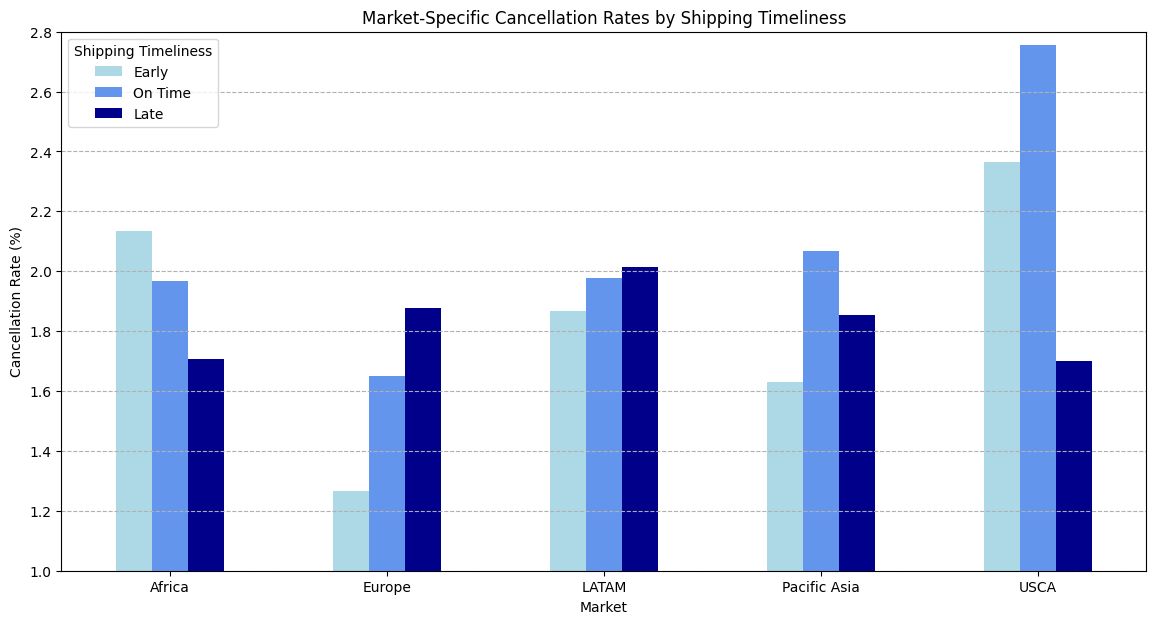

In [167]:
data['Shipping Gap'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']
data['Shipping Timeliness'] = pd.cut(data['Shipping Gap'],
                                     bins=[-float('inf'), -1, 0, float('inf')],
                                     labels=['Early', 'On Time', 'Late'])

data.sort_values(['Customer Id', 'order date (DateOrders)'], inplace=True)

data['Is Canceled'] = data['Next Order Status'] == 'CANCELED'

cancellation_rates_by_market = data.groupby(['Market', 'Shipping Timeliness'])['Is Canceled'].mean().unstack() * 100

color_map = {'Early': '#add8e6', 'On Time': '#6495ed', 'Late': '#00008b'}

ax = cancellation_rates_by_market.plot(kind='bar', figsize=(14, 7), color=[color_map[key] for key in ['Early', 'On Time', 'Late']])
plt.title('Market-Specific Cancellation Rates by Shipping Timeliness')
plt.xlabel('Market')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Shipping Timeliness', loc='upper left')
plt.grid(axis='y', linestyle='--')

plt.ylim(1, 2.8)

plt.show()